In [2]:
#setup path
path = r'C:/Users/mark/Documents/GitHub/honours/dev/package/'
import sys; sys.path.append(path)

#standard imports
import numpy as np
import pandas as pd
import datetime
from scipy import stats
from collections import OrderedDict
import csv

#third party imports
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib import rcParams
from matplotlib import rc
import seaborn as sns
from sklearn.metrics import auc

#local imports
import analysis.dataPreparer as dp
import analysis.getStages as gs

%matplotlib inline
rcParams['figure.figsize'] = 12, 12
sns.set_style("whitegrid")


In [22]:
df = pd.read_csv(r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/autoVC/6/log_results.csv", quoting = csv.QUOTE_ALL)

In [23]:
df.describe()

,AUC,F1,MC,PRC,build_identifier,cv_folds,index,max_observations,mean_fit_time,mean_score_time,...,rank_test_score,search_iterations,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score,time_slices,verbosity
count,276.000000,276.000000,276.000000,276.000000,276.0,276.000000,276.0,0.0,274.000000,274.000000,...,274.000000,276.000000,274.000000,274.000000,240.000000,274.000000,274.000000,274.000000,276.0,276.0
mean,0.630785,0.196562,0.194259,0.321866,6.0,2.876812,0.0,NaN,37.252712,291.618348,...,9.547445,18.108696,0.630610,0.629368,0.634335,3.261671,17.843013,0.005084,1.0,1.0
std,0.088065,0.079290,0.064052,0.076114,0.0,0.329250,0.0,NaN,91.699223,514.336457,...,5.992634,5.066374,0.088382,0.086761,0.085555,6.959874,45.113657,0.008808,0.0,0.0
min,0.321747,0.026131,-0.157422,0.134000,6.0,2.000000,0.0,NaN,2.796025,32.348091,...,1.000000,2.000000,0.321747,0.500000,0.505993,0.013274,0.449675,0.000000,1.0,1.0
25%,0.533649,0.123531,0.156644,0.270632,6.0,3.000000,0.0,NaN,9.011404,96.265165,...,4.000000,20.000000,0.534718,0.532174,0.533359,0.433001,2.415352,0.002175,1.0,1.0
50%,0.656935,0.226779,0.208584,0.318675,6.0,3.000000,0.0,NaN,20.297044,160.230687,...,9.000000,20.000000,0.659408,0.648708,0.659165,0.987744,4.763123,0.003871,1.0,1.0
75%,0.704297,0.254315,0.238418,0.377380,6.0,3.000000,0.0,NaN,32.915630,307.110949,...,15.000000,20.000000,0.703608,0.705726,0.702679,3.092413,14.209315,0.005920,1.0,1.0
max,0.779545,0.323758,0.299902,0.524570,6.0,3.000000,0.0,NaN,914.632511,5146.840281,...,20.000000,20.000000,0.770654,0.779545,0.771908,65.756161,395.200734,0.100869,1.0,1.0


In [24]:
main_metrics = ["AUC", "F1", "MC", "PRC", "Time"]

In [25]:
df["param_extractor__n_components_bin_20"] = df["param_extractor__n_components"] // 20

In [26]:
df["Time"] = df["mean_fit_time"]
df["Classifier"] = df["Classifier"].apply(lambda x: x.split("(")[0])
df["param_scaler"] = df["param_scaler"].dropna().apply(lambda x: x.split("(")[0])
df = df.apply(lambda col: col.replace(np.nan, "None") if col.dtype is not np.number else col, axis=1)

In [27]:
df = df.loc[df['param_imputer__strategy'] != "None"]

In [28]:
df["Imputer"] = df["param_imputer__strategy"].map({"most_frequent": "Mode", "median": "Median", "mean": "Mean"})
df["Transformer"] = df["param_transformer__func"].map({"None":"None","<ufunc 'sqrt'>":"SQRT","<ufunc 'log1p'>": "Log1P"})
df["Scaler"] = df['param_scaler']
df["Extractor"]=df['param_extractor__n_components_bin_20'].map({0 : "1-20", 1 : "21-40", 2: "41-60",3: "61-80", 4: "81-100"})
df["Classifier"]=df['Classifier'].map({"LogisticRegression": "Logistic Regression", "RandomForestClassifier":"Random Forest", "DecisionTreeClassifier": "Decision Tree", "GaussianNB": "Naive Bayes", "MLPClassifier": "Artificial Neural Network", "KNeighborsClassifier": "K-Nearest Neighbors", "SVC": "Support Vector Machine"})

In [29]:
df["Time"] = df["Time"].replace("None", np.nan)

In [30]:
df.groupby("Classifier").median()[main_metrics]

,AUC,F1,MC,PRC,Time
Classifier,,,,,
Artificial Neural Network,0.578511,0.223868,0.189419,0.252644,15.879114
Decision Tree,0.688221,0.223412,0.210703,0.360850,15.864375
K-Nearest Neighbors,0.524140,0.092723,0.125698,0.255763,10.035838
Logistic Regression,0.726981,0.243233,0.241469,0.405042,14.909982
Naive Bayes,0.659739,0.252552,0.224296,0.316507,26.450772
Random Forest,0.711114,0.260292,0.261254,0.382261,55.051623
Support Vector Machine,0.548872,0.174662,0.113024,0.406222,746.191362


In [310]:
df["Imputer"] = df["Imputer"]
df["Imputer"] = df["Imputer"].map({"most_frequent": "Mode", "median": "Median", "mean": "Mean"})
df["Imputer"] = df["Imputer"].map({"most_frequent": "Mode", "median": "Median", "mean": "Mean"})

In [355]:
len(df["Scaler"].value_counts().index.tolist())

4

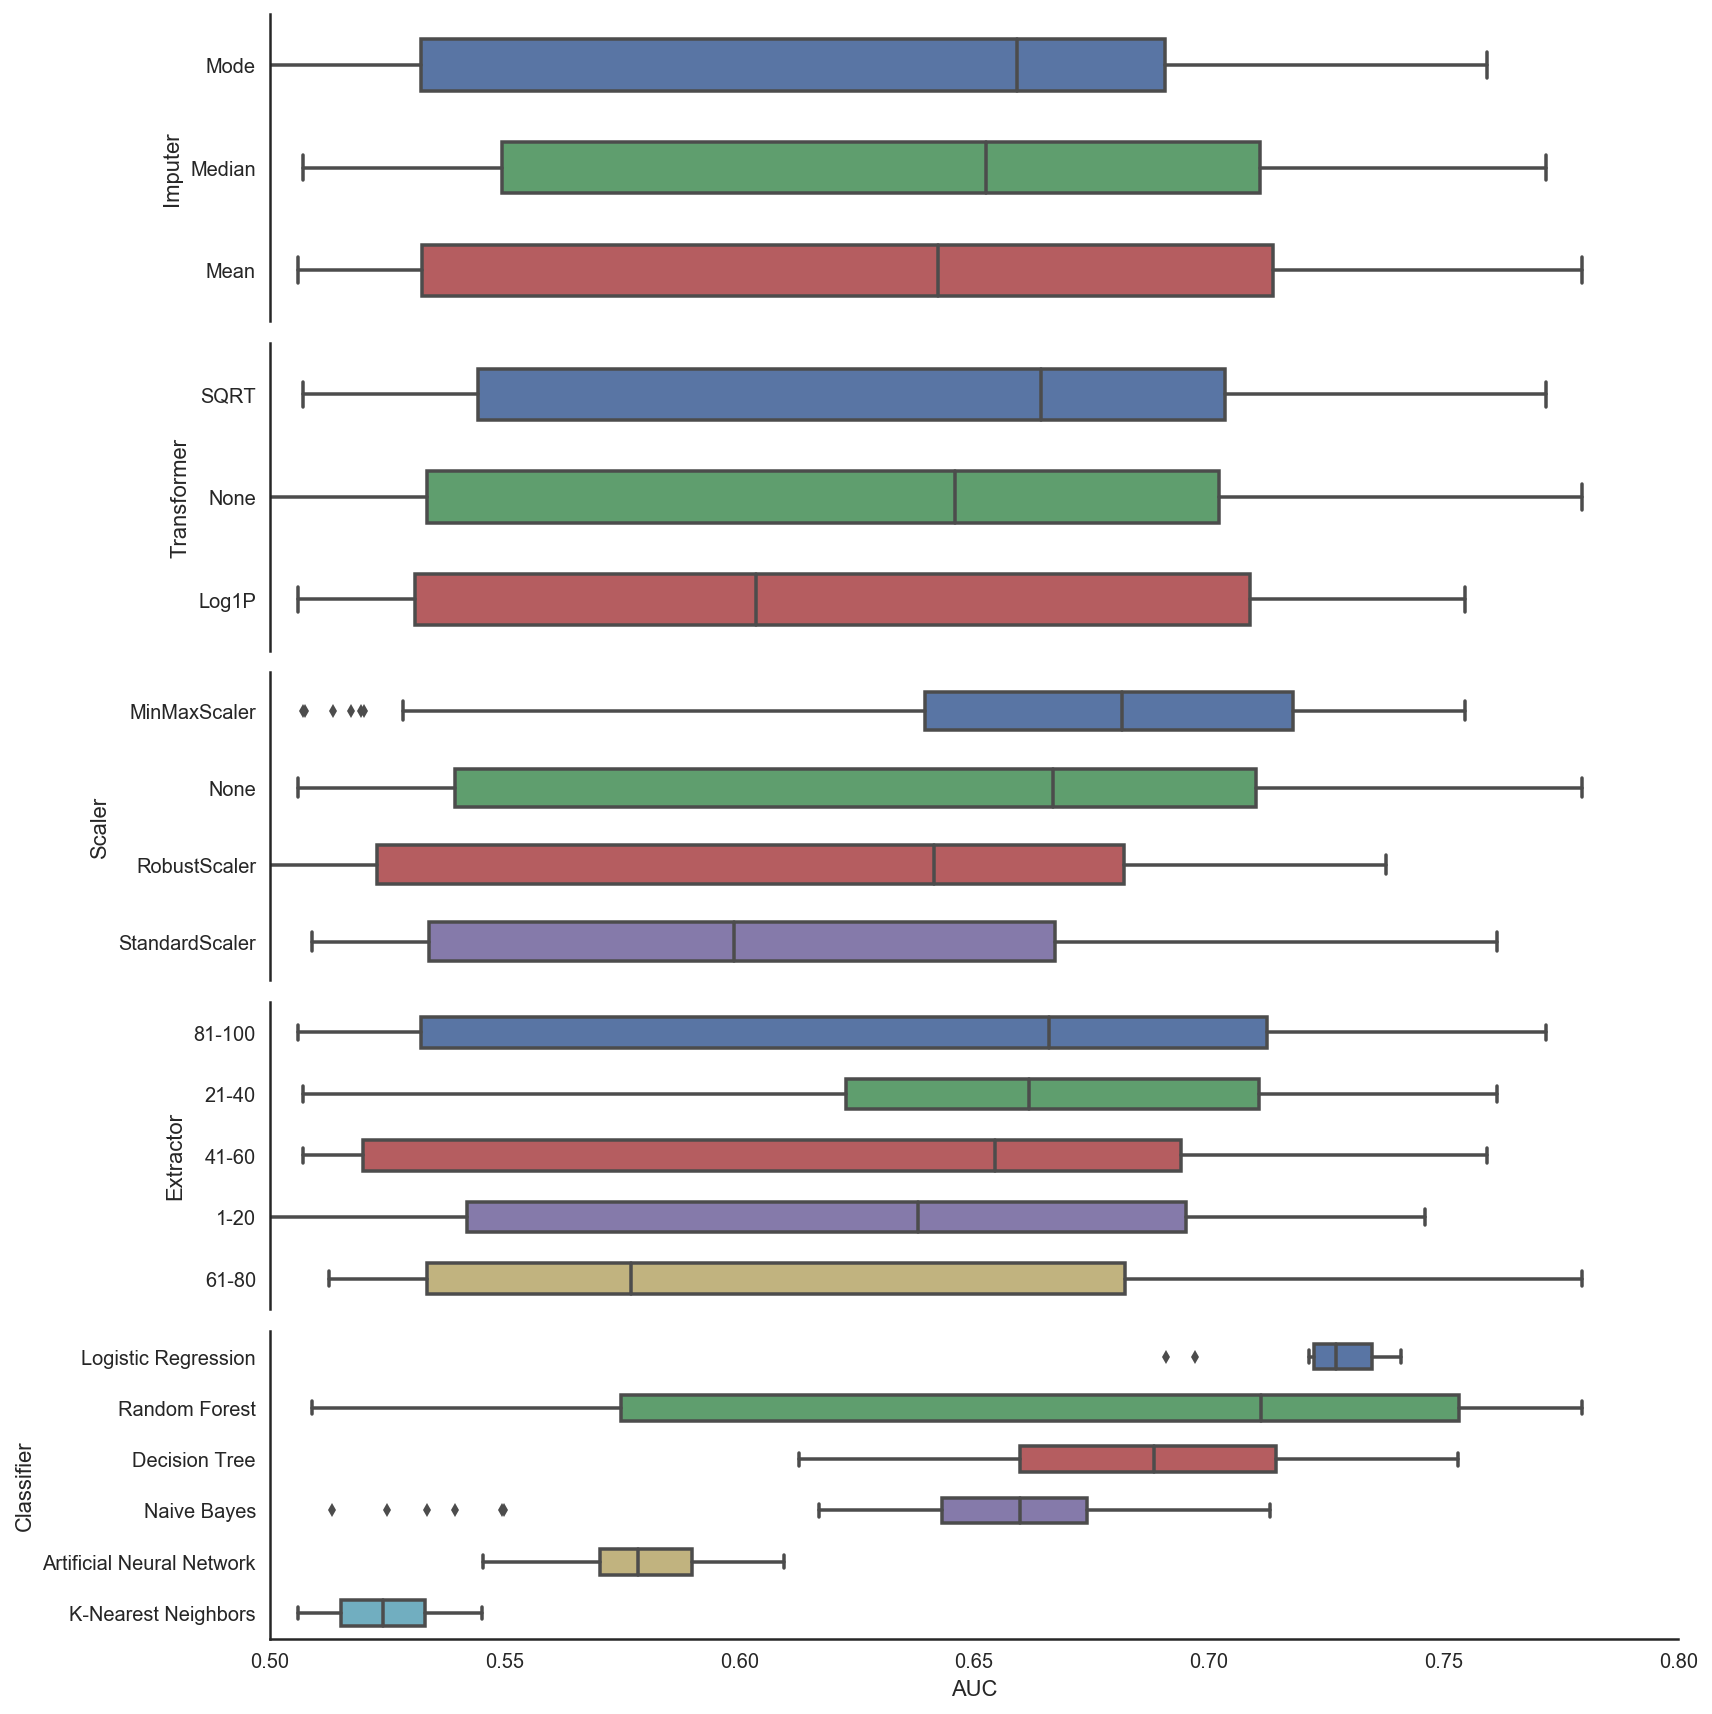

In [374]:
with sns.axes_style("white"):
    f, axes = plt.subplots(5, 1, sharex=True)
    f.set_size_inches(12, 12)

    parameters = ['Imputer', "Transformer", "Scaler", "Extractor", "Classifier"]

    for i, axis in enumerate(axes): 
        axis.set_xlim([0.5, 0.8])
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        if i < len(axes) - 1:
            axis.xaxis.label.set_visible(False)
            axis.spines['bottom'].set_visible(False)
        order = df.groupby(parameters[i])["AUC"].median().sort_values(ascending=False).index.tolist()
        sns.boxplot(data=df, x = 'AUC', y = parameters[i], order=order, width=0.5, ax = axis)

    plt.tight_layout()


In [369]:
df["F1"].describe()

count    270.000000
mean       0.196250
std        0.079173
min        0.026131
25%        0.123818
50%        0.226027
75%        0.253487
max        0.323758
Name: F1, dtype: float64

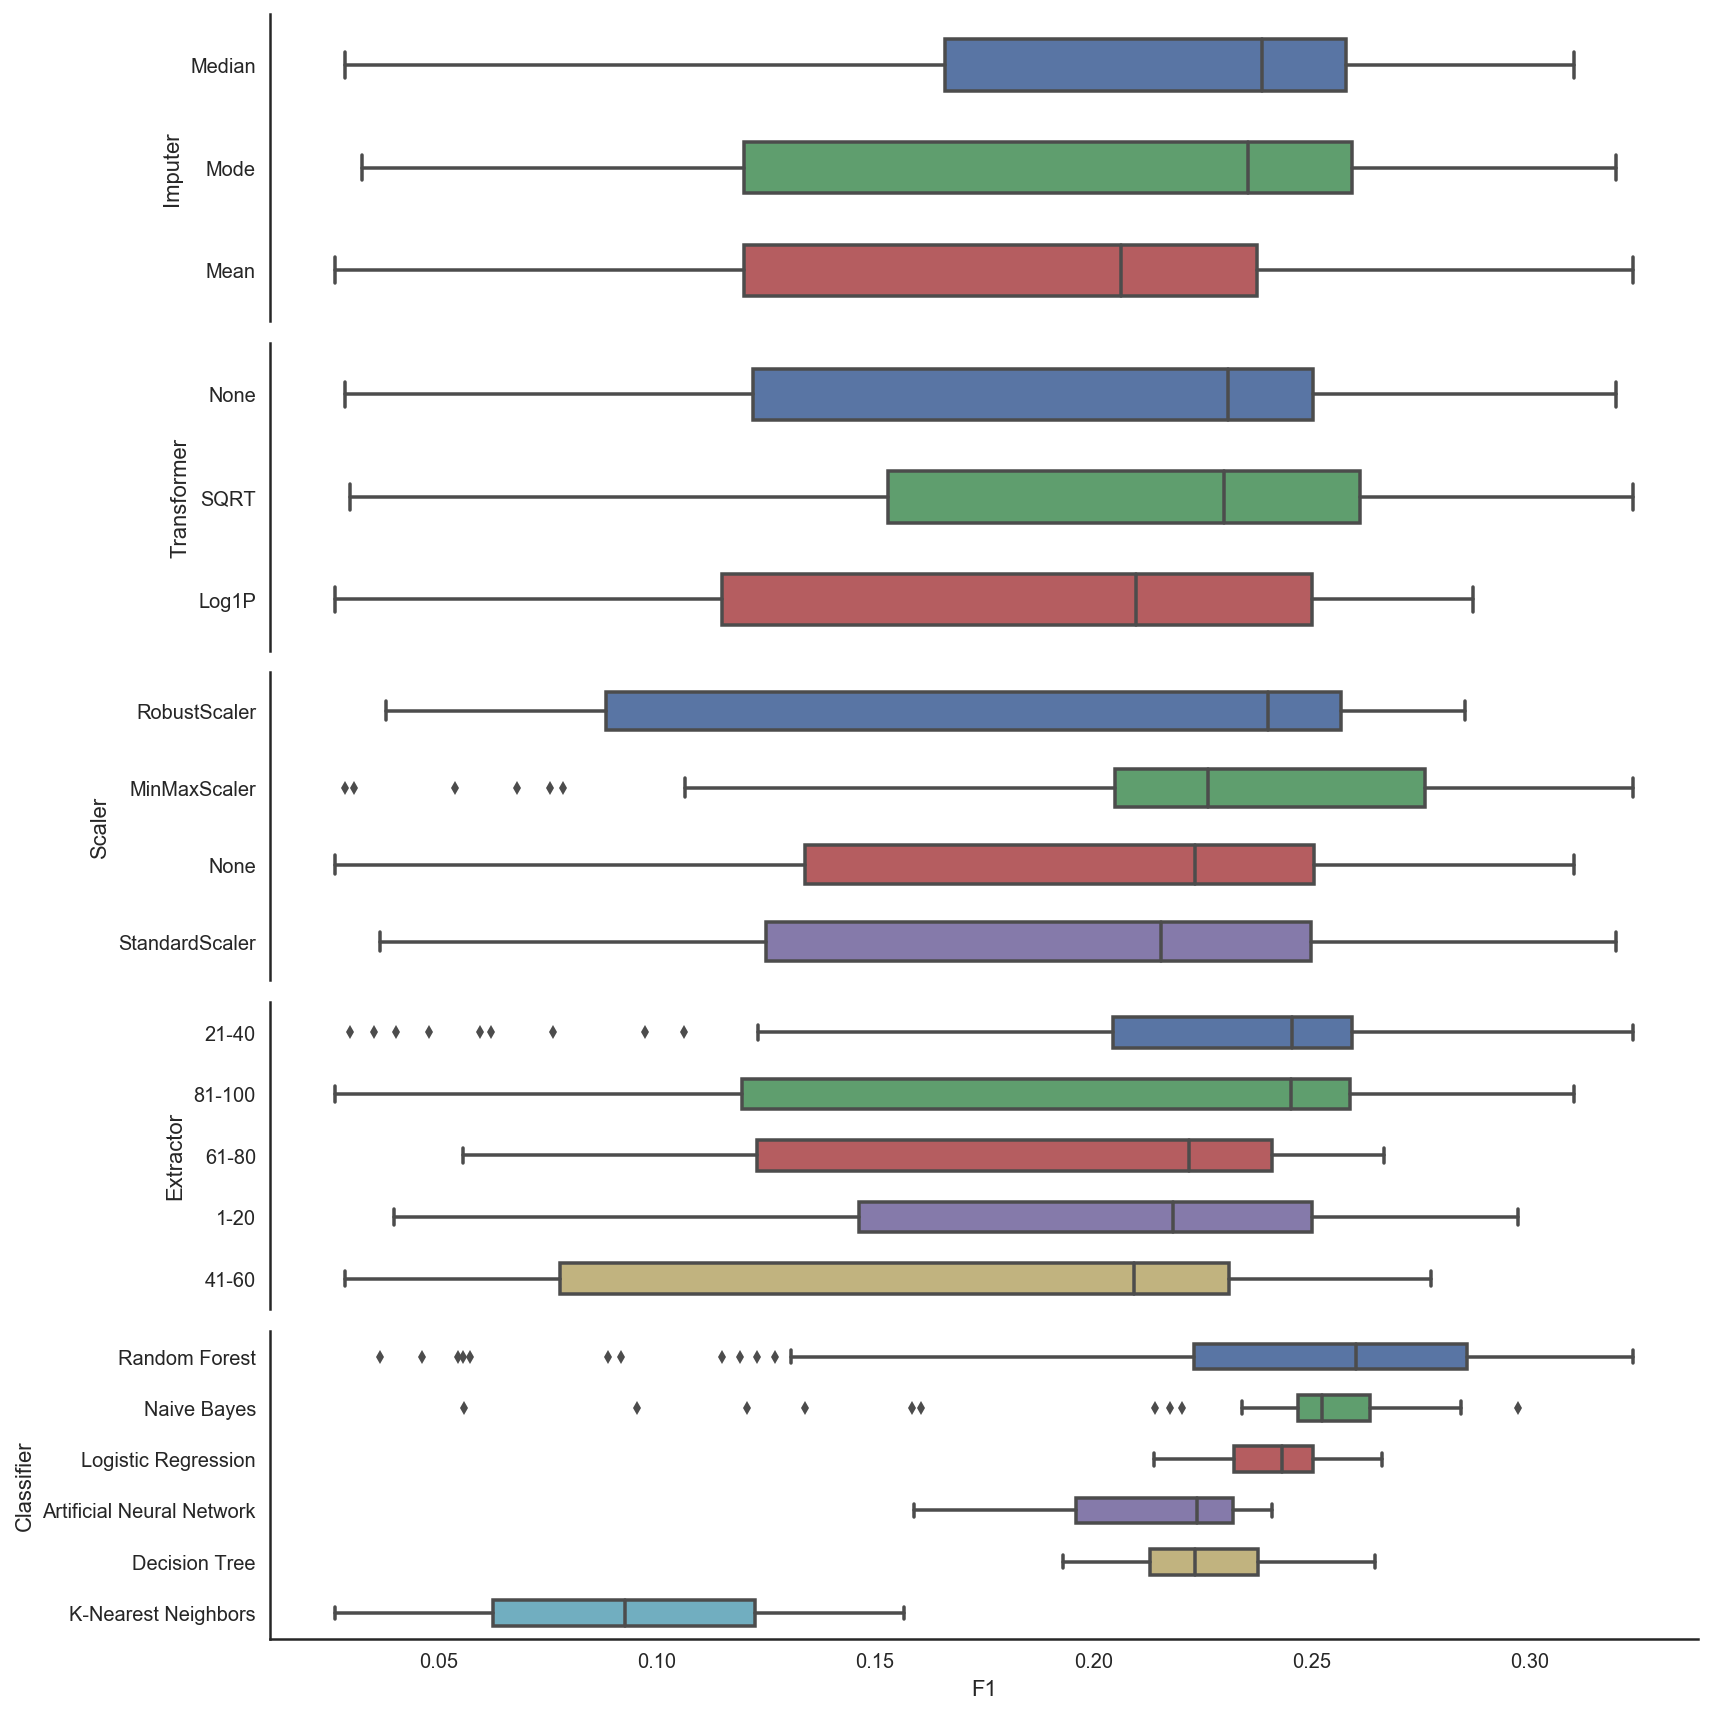

In [370]:
sns.set_style("white")
f, axes = plt.subplots(5, 1, sharex=True)
f.set_size_inches(12, 12)

parameters = ['Imputer', "Transformer", "Scaler", "Extractor", "Classifier"]

for i, axis in enumerate(axes): 
    #axis.set_xlim([0.5, 0.8])
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    if i < len(axes) - 1:
        axis.xaxis.label.set_visible(False)
        axis.spines['bottom'].set_visible(False)
    width = 2 / float(len(df[parameters[i]].value_counts().index.tolist()))
    order = df.groupby(parameters[i])["F1"].median().sort_values(ascending=False).index.tolist()
    sns.boxplot(data=df, x = 'F1', y = parameters[i], order=order, width=0.5, ax = axis)
    
plt.tight_layout()


ROC Curve

In [24]:
def plot_roc_curve(df, iv, dv, x, y, n=None):

    def convert_array(x):
        y = []
        for v in x.split():
            try: float(v)
            except: pass
            else: y.append(float(v))
        return y
        
    roc_x = df[x].apply(convert_array)
    roc_y = df[y].apply(convert_array)
    roc_clf = pd.concat([df[iv], roc_x, roc_y],axis=1)
    roc_clf.index = roc_clf[iv]
    roc_x_clf_split = roc_clf.apply(lambda a: pd.Series(a[x]),axis=1)
    roc_y_clf_split = roc_clf.apply(lambda a: pd.Series(a[y]),axis=1)
    roc_clf_split = pd.DataFrame()
    for col in list(roc_x_clf_split):
        roc_clf_split[col] = list(zip(roc_x_clf_split[col], roc_y_clf_split[col]))
    roc_clf_split[iv] = roc_clf_split.index = roc_x_clf_split.index
    roc_clf_melt = pd.melt(roc_clf_split, id_vars=iv)
    if n: roc_clf_melt = roc_clf_melt.sample(n)
    roc_clf_melt[x] = roc_clf_melt.apply(lambda a: a['value'][0], axis=1)
    roc_clf_melt[y] = roc_clf_melt.apply(lambda a: a['value'][1], axis=1)
    roc_clf_melt = roc_clf_melt[[iv,x,y]]
    roc_clf_melt = roc_clf_melt.dropna()
    
    groups = roc_clf_melt[iv].value_counts().index.tolist()
    grp_aucs = {group: df.groupby(iv).get_group(group)[dv].max() for group in groups}
    print(grp_aucs)
    
    g = sns.lmplot(data = roc_clf_melt, x=x, y=y, hue=iv, fit_reg =False, x_bins = 100, x_estimator = np.max)
    g.axes[0][0].plot((0, 1), (0, 1), 'k--')

{'Mode': 0.75928647208557487, 'Median': 0.77178032250413686, 'Mean': 0.77954465689722063}


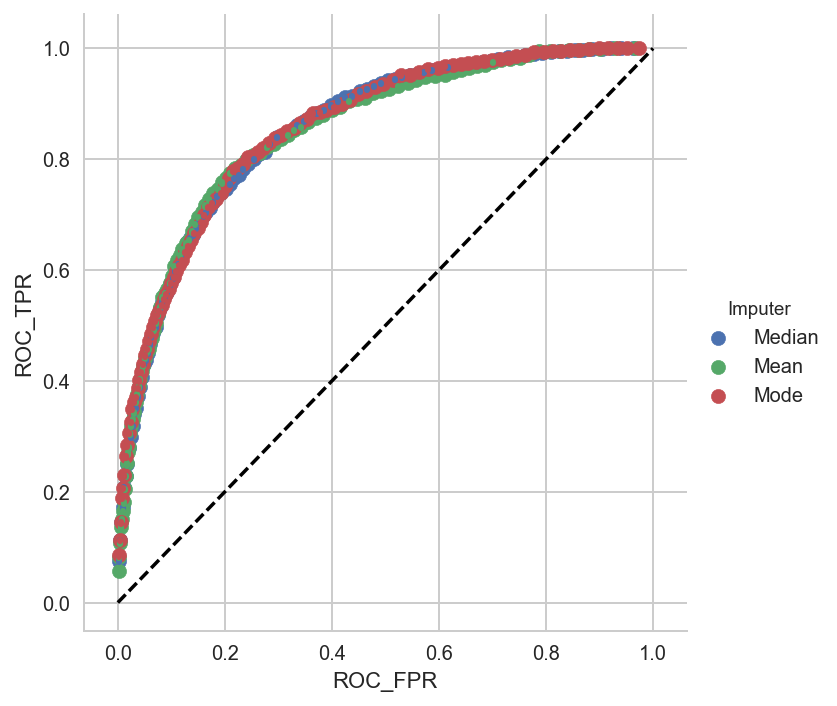

In [376]:
#Imputation Strategies
plot_roc_curve(df, iv = "Imputer", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

{"<ufunc 'log1p'>": 0.6633473333206263, 'None': 0.6476162159921459, "<ufunc 'sqrt'>": 0.6874810101369383}


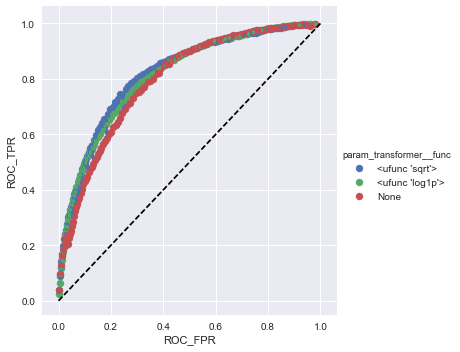

In [72]:
#Transformation Functions
plot_roc_curve(df, iv = "param_transformer__func", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

{'MinMaxScaler': 0.6403293749616866, 'None': 0.6774008700567352, 'StandardScaler': 0.677536298322181, 'RobustScaler': 0.6595490834879532}


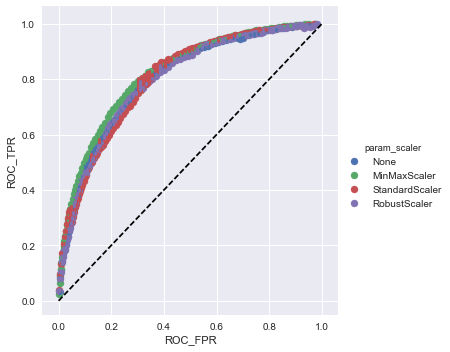

In [76]:
#Scaling Functions
plot_roc_curve(df, iv = "param_scaler", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

{4: 0.6585924526012779, 0: 0.6643398383892103, 2: 0.6556437488418754, 3: 0.6550657543875643, 1: 0.6861463195997645}


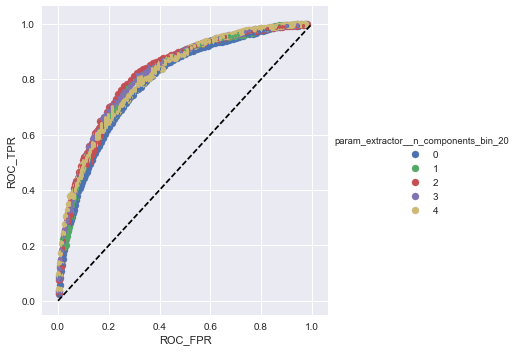

In [77]:
#Extracted Components
df["param_extractor__n_components_bin_20"] = df["param_extractor__n_components"] // 20
plot_roc_curve(df, iv = "param_extractor__n_components_bin_20", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

{'RandomForestClassifier': 0.6578401748025663, 'GaussianNB': 0.6546694010695638, 'DecisionTreeClassifier': 0.6767553409078066}


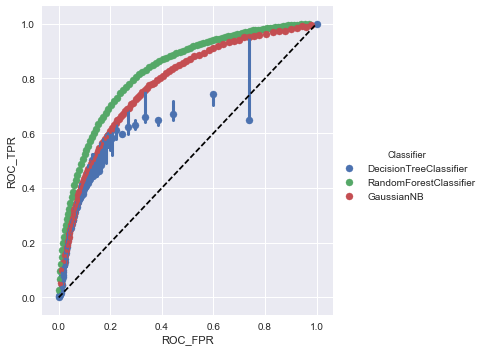

In [70]:
#Classification Algorithms
plot_roc_curve(df, iv = "Classifier", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

Learning Curve

In [83]:
test_scores = "[[ 0.67229625  0.85386642  0.85650085][ 0.66330958  0.74074074  0.74662947][ 0.71335606  0.74941887  0.84441345][ 0.76355748  0.80846118  0.82581745][ 0.74480942  0.77545328  0.65271967]]"
train_scores = "[[ 0.71860465  0.89224806  0.89224806][ 0.67835002  0.76895565  0.76895565][ 0.72781065  0.76627219  0.85629755][ 0.77234553  0.82303539  0.83633273][ 0.74484736  0.7911824   0.65643887]]"
train_sizes = "[ 1290  4194  7098 10002 12906]"

In [7]:
def str_to_matrix(string):
    return np.matrix(string.replace("\r\n ","").replace("][",";").replace("[","").replace("]",""))

In [6]:
def plot_learning_curve(test_scores, train_scores, train_sizes):
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores,axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
            
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [121]:
df_evaluate = df_evaluate.reset_index()

In [122]:
df_evaluate["Train_Sizes"].ix[0]

array([ 9478, 18956, 28434, 37912, 47391, 56869, 66347, 75825, 85303, 94782])

In [7]:
def concat_lists(series):
    return np.array(list(zip(*[element for list_ in [np.array(list(zip(*list_))) for list_ in series] for element in list_])))

In [114]:
df_evaluate["Train_Scores"].ix[0]

array([[ 0.74546133,  0.75417576,  0.75365601],
       [ 0.73670277,  0.74331936,  0.74305362],
       [ 0.73299463,  0.7412405 ,  0.74203555],
       [ 0.73162644,  0.73782492,  0.73714259],
       [ 0.73261876,  0.73659603,  0.736754  ],
       [ 0.73395471,  0.73549852,  0.73728166],
       [ 0.73225648,  0.73494138,  0.73478068],
       [ 0.73066344,  0.7328065 ,  0.73404305],
       [ 0.73389071,  0.73453191,  0.73334466],
       [ 0.73328444,  0.73457792,  0.73404572]])

In [49]:
df_evaluate["Test_Scores"].ix[0]

array([[ 0.72580389,  0.72418306,  0.72309633],
       [ 0.72609657,  0.7298552 ,  0.72692814],
       [ 0.72797809,  0.73042297,  0.72845219],
       [ 0.73075571,  0.73026038,  0.72853805],
       [ 0.73183712,  0.73013649,  0.73198845],
       [ 0.73158916,  0.72949955,  0.73179624],
       [ 0.73208776,  0.72953635,  0.73028888],
       [ 0.73256326,  0.72997774,  0.73036031],
       [ 0.73366124,  0.73086302,  0.73043034],
       [ 0.73252877,  0.730811  ,  0.73028906]])

In [ ]:
df_create["Classifier"] = df_create["Classifier"].apply(lambda x: str(x).split("(")[0])
df_create = df_create.reset_index()

In [4]:
df_select["Classifier"] = df_select["Classifier"].apply(lambda x: str(x).split("(")[0])
df_select = df_select.reset_index()

In [164]:
df_select["label_stage"].ix[0].value_counts().sum()

65183

In [165]:
df_select["Train_Sizes"].ix[0].max()

14485

LogisticRegression
RandomForestClassifier
GaussianNB
DecisionTreeClassifier


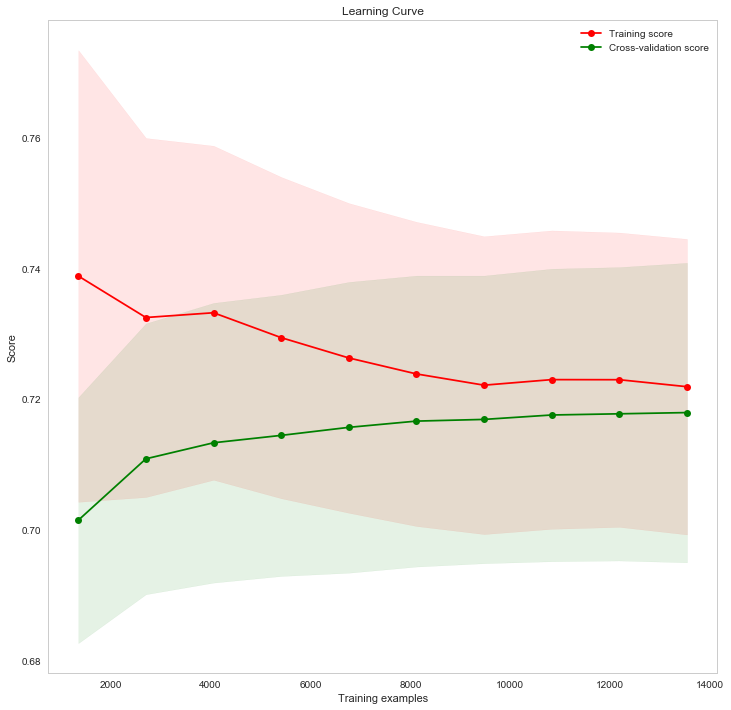

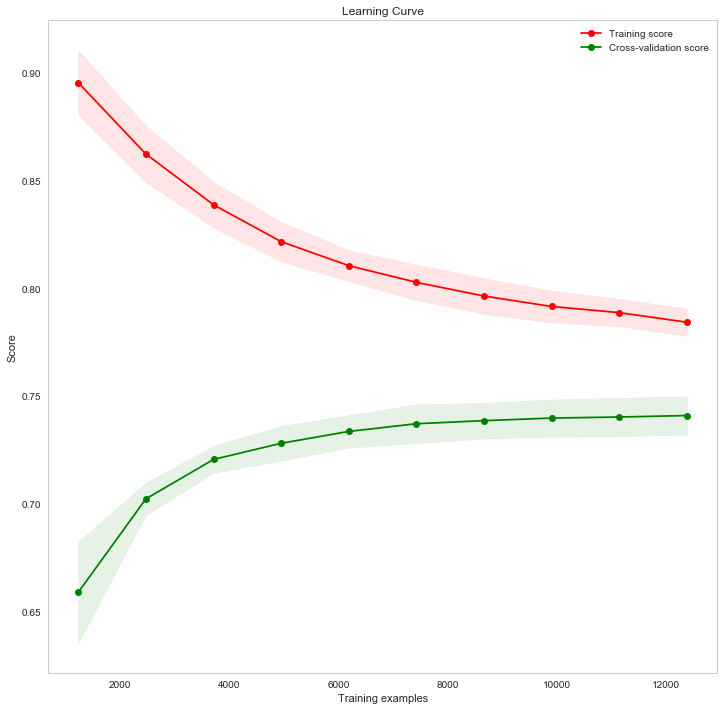

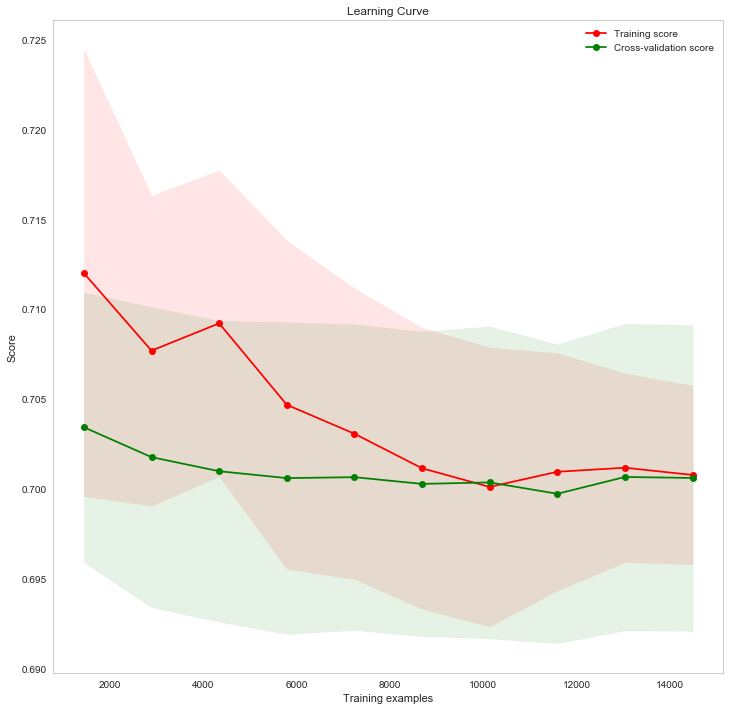

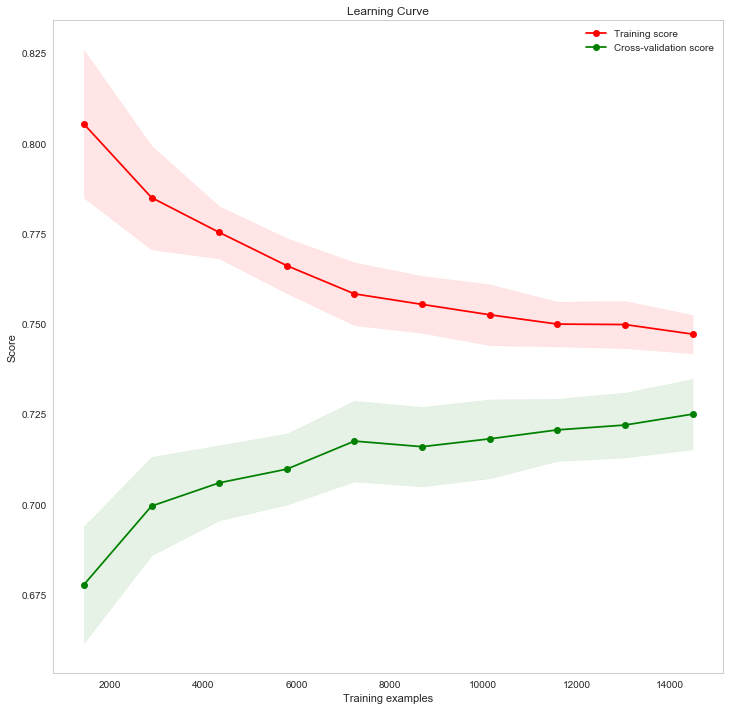

In [8]:
classifiers = df_select["Classifier"].value_counts().index.tolist()
for i in classifiers:
    print(i)
    plot_learning_curve(
        concat_lists(df_select.loc[df_select["Classifier"] == i]["Test_Scores"]), 
        concat_lists(df_select.loc[df_select["Classifier"] == i]["Train_Scores"]), 
        df_select.loc[df_select["Classifier"] == i]["Train_Sizes"].sample(1).squeeze()
    )

GaussianNB
DecisionTreeClassifier
RandomForestClassifier
LogisticRegression


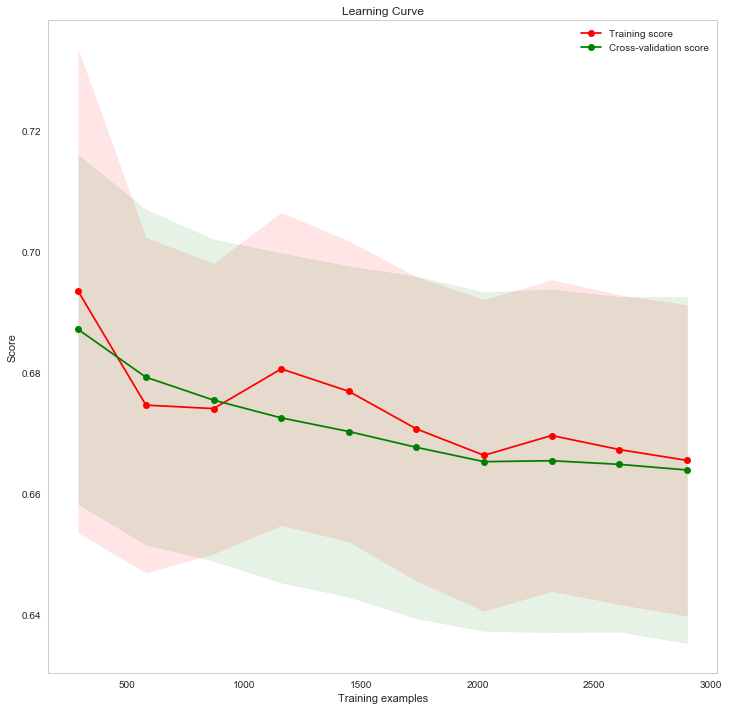

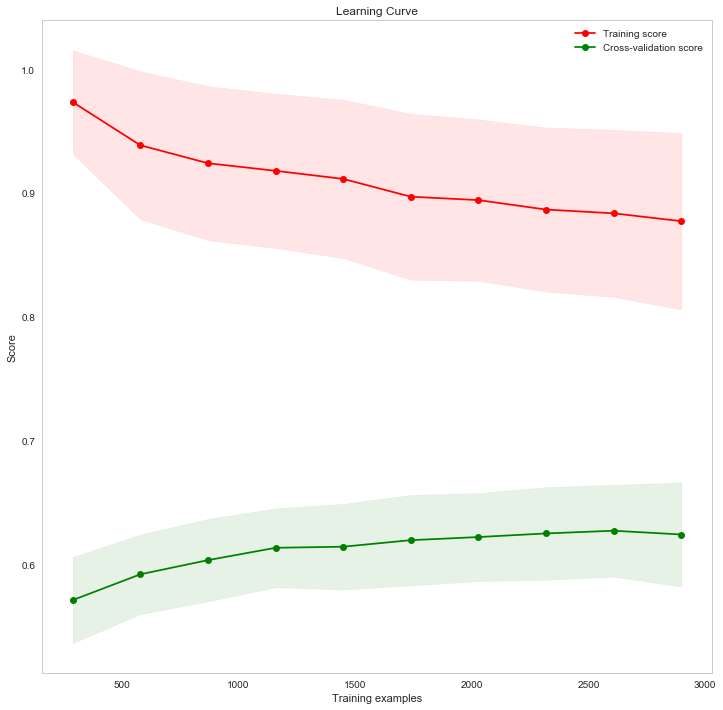

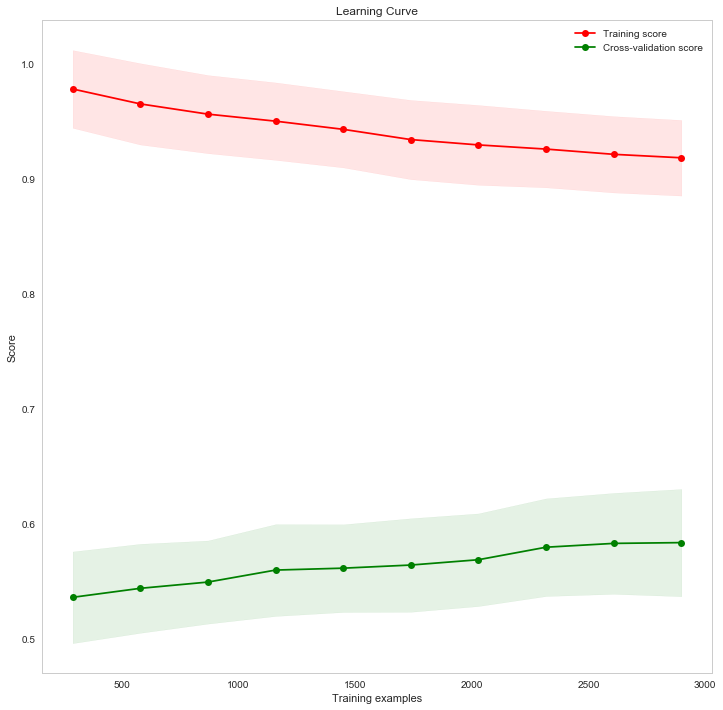

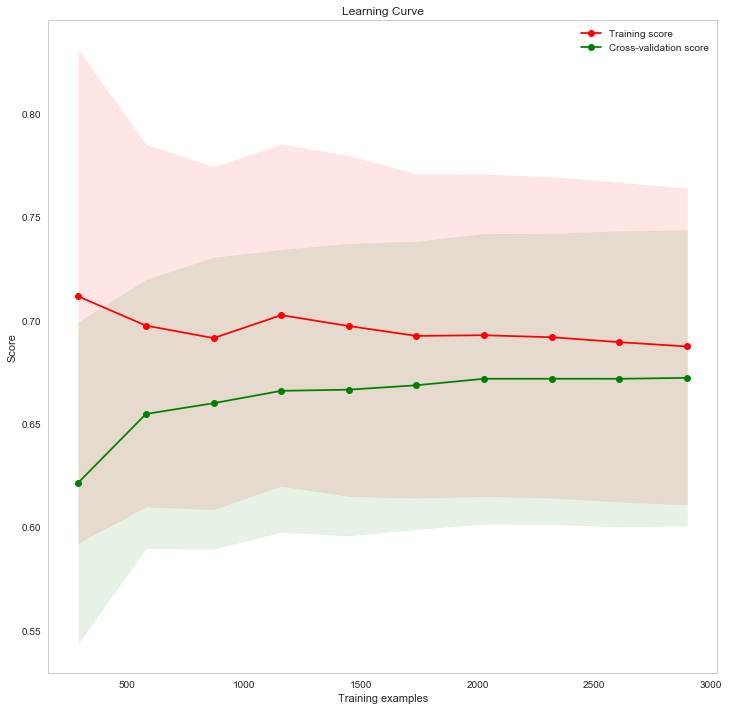

In [132]:
classifiers = df_create["Classifier"].value_counts().index.tolist()
for i in classifiers:
    print(i)
    plot_learning_curve(
        concat_lists(df_create.loc[df_create["Classifier"] == i]["Test_Scores"]), 
        concat_lists(df_create.loc[df_create["Classifier"] == i]["Train_Scores"]), 
        df_create.loc[df_create["Classifier"] == i]["Train_Sizes"].sample(1).squeeze()
    )

(10, 9) (10, 9) (10,)
[ 0.714053    0.71600574  0.71961313  0.71215607  0.71403587  0.71598061
  0.71545979  0.71417445  0.71383161  0.71355621]
[ 0.72809982  0.72285789  0.72133933  0.71579631  0.7160624   0.72034126
  0.7174506   0.71645856  0.71557255  0.71566021]


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

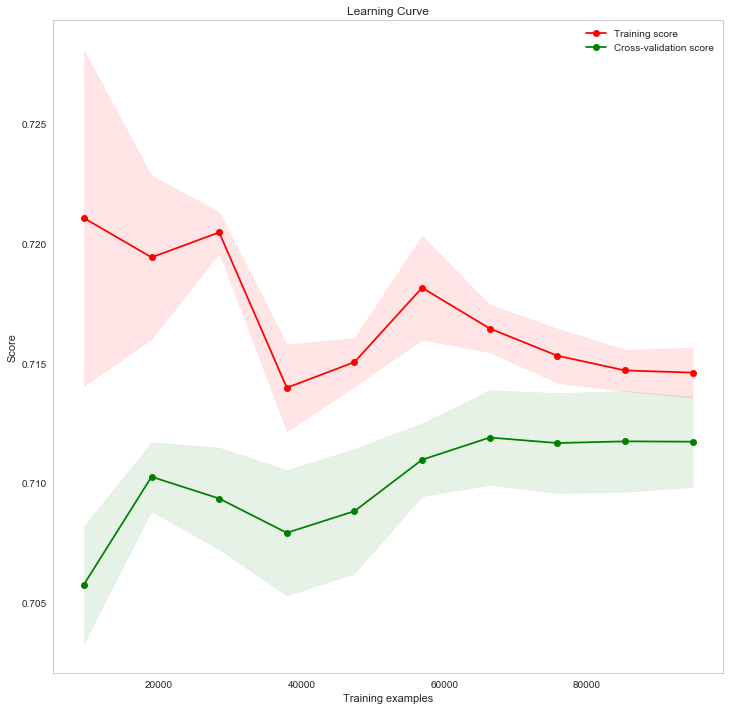

In [123]:
plot_learning_curve(concat_lists(df_evaluate["Test_Scores"]), concat_lists(df_evaluate["Train_Scores"]), df_evaluate["Train_Sizes"].ix[0])

In [32]:
df2 = pd.read_csv(r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/autoVC/9/log_results.csv", quoting = csv.QUOTE_ALL)

In [116]:
df3 = pd.read_csv(r"C:/Users/mark/Documents/GitHub/honours/dev/package/analysis/output/autoVC/10/log_results.csv", quoting = csv.QUOTE_ALL)

In [117]:
df2 = pd.concat([df2, df3],axis=0)

In [118]:
df2.describe()

,AUC,F1,MC,PRC,build_identifier,cv_folds,index,max_observations,mean_fit_time,mean_score_time,...,rank_test_score,search_iterations,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score,time_slices,verbosity
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.0,255.0,0.0,240.000000,240.000000,...,240.000000,255.0,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,255.000000,255.0
mean,0.670855,0.253200,0.235924,0.354983,9.411765,3.0,0.0,NaN,62.874814,294.609094,...,3.000000,5.0,0.667988,0.666127,0.671813,1.589183,6.543365,0.004751,4.176471,1.0
std,0.072302,0.069494,0.053302,0.084717,0.493121,0.0,0.0,NaN,49.739885,188.824199,...,1.417169,0.0,0.071878,0.072454,0.073070,3.476352,25.023195,0.002724,0.986242,0.0
min,0.519187,0.075778,0.068609,0.133641,9.000000,3.0,0.0,NaN,7.647976,58.955397,...,1.000000,5.0,0.529758,0.519187,0.524792,0.047594,0.050254,0.000212,3.000000,1.0
25%,0.606690,0.195628,0.202690,0.302105,9.000000,3.0,0.0,NaN,29.777046,157.416681,...,2.000000,5.0,0.606149,0.602571,0.606057,0.296280,0.830149,0.002429,3.000000,1.0
50%,0.687438,0.264239,0.241933,0.363237,9.000000,3.0,0.0,NaN,46.906016,231.546616,...,3.000000,5.0,0.685823,0.674634,0.687367,0.767642,1.568813,0.004549,5.000000,1.0
75%,0.733321,0.309494,0.276631,0.428977,10.000000,3.0,0.0,NaN,82.488541,402.267238,...,4.000000,5.0,0.729119,0.728074,0.732483,1.225919,2.163985,0.006211,5.000000,1.0
max,0.781154,0.379010,0.336965,0.479758,10.000000,3.0,0.0,NaN,280.269605,1020.358265,...,5.000000,5.0,0.776731,0.778015,0.781154,22.712310,196.943998,0.014060,5.000000,1.0


In [119]:
from datetime import date, timedelta

In [107]:
df2 = df2.apply(lambda col: col.replace(np.nan, "None") if col.dtype is not np.number else col, axis=1)
df2["Time"] = df2["mean_fit_time"]

df2["Classifier"] = df2["Classifier"].apply(lambda x: x.split("(")[0])
df2["param_scaler"] = df2["param_scaler"].apply(lambda x: x.split("(")[0])

In [408]:
def split_date(x):
    return date(*map(int, x.split("-")))

df2["label_date"] = df2["label_slice"].apply(split_date)
df2["feature_date"] = df2["feature_slice"].apply(split_date)
df2["forecast_window"] =  df2["label_date"] - df2["feature_date"]

In [149]:
df2["forecast_window"].value_counts()

546 days     60
728 days     60
364 days     45
1092 days    30
1274 days    30
910 days     30
Name: forecast_window, dtype: int64

In [109]:
df2["mean_fit_time"].replace("None", np.nan, inplace=True)
df2.groupby("Classifier")["mean_fit_time"].median()

Classifier
RandomForestClassifier    35.855907
Name: mean_fit_time, dtype: float64

In [ ]:
df2["feature"]

In [403]:
df2["forecast_window_months"] = df2["forecast_window"].apply(lambda x: x.days // 30)

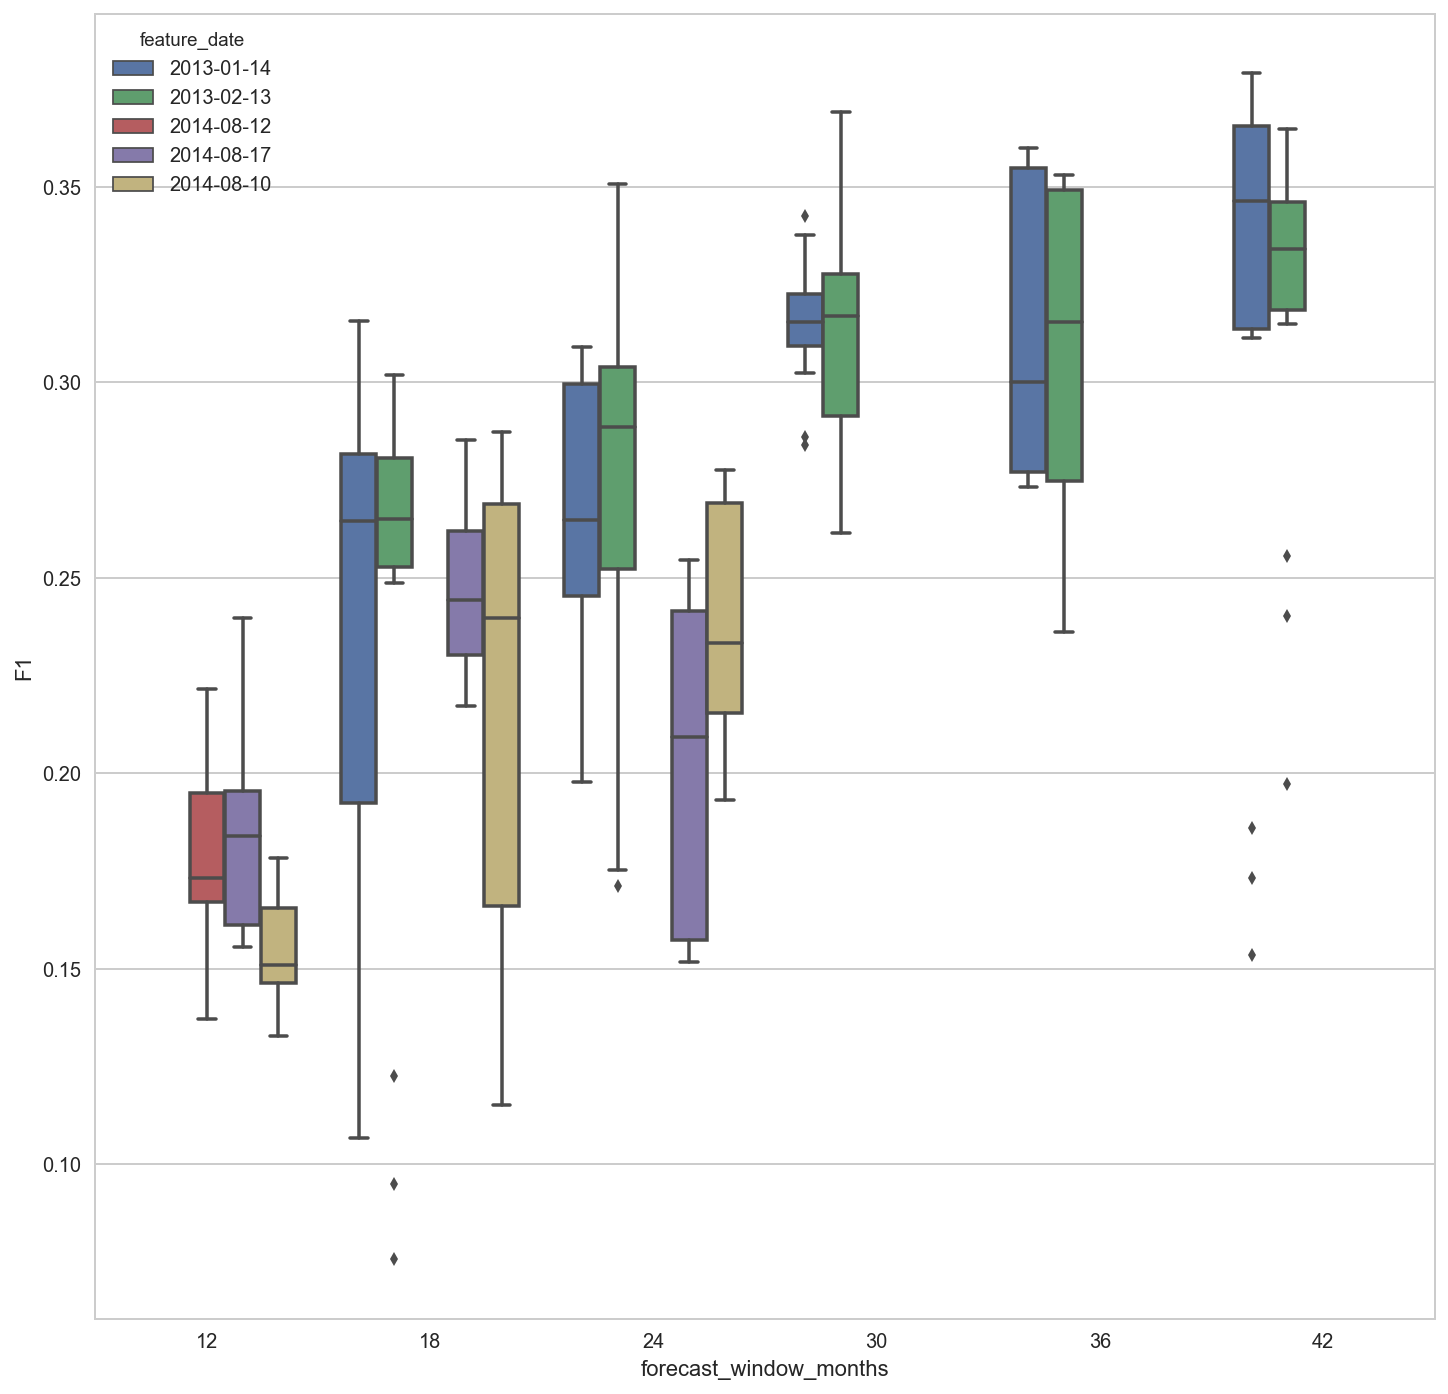

In [410]:
sns.boxplot(data=df2, y = "F1", hue = "feature_date", x="forecast_window_months")

{Timedelta('728 days 00:00:00'): 0.77022337851897893, Timedelta('546 days 00:00:00'): 0.76329025510768245, Timedelta('364 days 00:00:00'): 0.78115383254925552, Timedelta('1274 days 00:00:00'): 0.74469442450236711, Timedelta('1092 days 00:00:00'): 0.75664897852000645, Timedelta('910 days 00:00:00'): 0.76026964706702338}


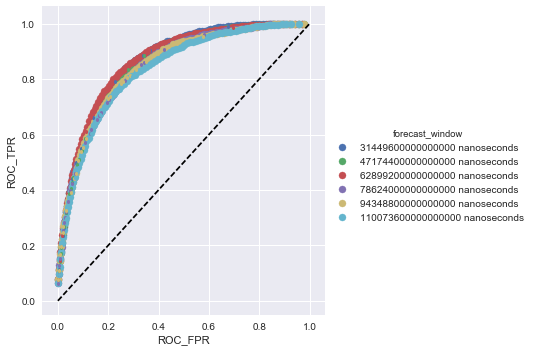

In [150]:
plot_roc_curve(df2, iv = "forecast_window", dv = "AUC", x = "ROC_FPR", y = "ROC_TPR", n = None)

In [34]:
df2.sort_values(by="AUC", ascending=False)[0:10]

,index,AUC,Classifier,F1,MC,PRC,Params,ROC_FPR,ROC_TPR,ROC_Thresholds,...,param_scaler,param_transformer__func,params,rank_test_score,split0_test_score,split1_test_score,split2_test_score,std_fit_time,std_score_time,std_test_score
71,0,0.763290,"RandomForestClassifier(bootstrap=True, class_w...",0.277547,0.284389,0.449398,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 4.26766815e-05 4.2676681...,[ 0.00000000e+00 0.00000000e+00 7.8802206...,[ 1.89579295 0.89579295 0.89522014 0.860577...,...,"RobustScaler(copy=True, quantile_range=(25.0, ...",<ufunc 'log1p'>,"{'absolute__func': <ufunc 'absolute'>, 'clf': ...",1,0.755311,0.743651,0.763290,0.127011,0.050254,0.008064
110,0,0.760270,"RandomForestClassifier(bootstrap=True, class_w...",0.319133,0.305624,0.477541,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 0.00000000e+00 4.1937513...,[ 5.65291125e-04 3.39174675e-03 3.3917467...,[ 0.90034501 0.8857076 0.88159459 0.874866...,...,"StandardScaler(copy=True, with_mean=True, with...",<ufunc 'sqrt'>,"{'absolute__func': <ufunc 'absolute'>, 'clf': ...",1,0.749138,0.754839,0.760270,0.207545,0.674460,0.004545
29,0,0.756649,"RandomForestClassifier(bootstrap=True, class_w...",0.359125,0.330924,0.476584,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 0.00000000e+00 4.3440486...,[ 5.35905681e-04 5.35905681e-03 5.3590568...,[ 0.92777375 0.89684758 0.89451346 0.893959...,...,"MinMaxScaler(copy=True, feature_range=(0, 1))",NaN,"{'absolute__func': <ufunc 'absolute'>, 'clf': ...",1,0.745921,0.753096,0.756649,0.527706,0.834874,0.004462
40,0,0.756351,"RandomForestClassifier(bootstrap=True, class_w...",0.312062,0.298663,0.471742,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 0.00000000e+00 4.3215211...,[ 5.92768228e-04 2.37107291e-03 2.3710729...,[ 0.91410037 0.90287185 0.90061226 0.898829...,...,NaN,<ufunc 'sqrt'>,"{'absolute__func': <ufunc 'absolute'>, 'clf': ...",1,0.751101,0.756351,0.753298,0.305685,1.197230,0.002153
69,0,0.755311,"RandomForestClassifier(bootstrap=True, class_w...",0.282261,0.283706,0.437640,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 4.26748602e-05 4.2674860...,[ 0. 0. 0.00315209 0.003152...,[ 1.89331062 0.89331062 0.87127888 0.864432...,...,"RobustScaler(copy=True, quantile_range=(25.0, ...",<ufunc 'log1p'>,"{'absolute__func': <ufunc 'absolute'>, 'clf': ...",1,0.755311,0.743651,0.763290,0.127011,0.050254,0.008064
109,0,0.754839,"RandomForestClassifier(bootstrap=True, class_w...",0.316997,0.300899,0.470644,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 0.00000000e+00 4.1937513...,[ 5.65291125e-04 2.26116450e-03 2.2611645...,[ 0.89570969 0.87975962 0.87855275 0.873805...,...,"StandardScaler(copy=True, with_mean=True, with...",<ufunc 'sqrt'>,"{'absolute__func': <ufunc 'absolute'>, 'clf': ...",1,0.749138,0.754839,0.760270,0.207545,0.674460,0.004545
41,0,0.753298,"RandomForestClassifier(bootstrap=True, class_w...",0.323469,0.305360,0.464055,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 4.32152118e-05 4.3215211...,[ 5.93119810e-04 5.93119810e-04 1.1862396...,[ 0.91275732 0.90897267 0.90847571 0.907032...,...,NaN,<ufunc 'sqrt'>,"{'absolute__func': <ufunc 'absolute'>, 'clf': ...",1,0.751101,0.756351,0.753298,0.305685,1.197230,0.002153
28,0,0.753096,"RandomForestClassifier(bootstrap=True, class_w...",0.359891,0.329664,0.472032,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 0.00000000e+00 4.3438599...,[ 5.35905681e-04 5.89496249e-03 5.8949624...,[ 0.92570434 0.89596649 0.8958352 0.891143...,...,"MinMaxScaler(copy=True, feature_range=(0, 1))",NaN,"{'absolute__func': <ufunc 'absolute'>, 'clf': ...",1,0.745921,0.753096,0.756649,0.527706,0.834874,0.004462
143,0,0.751573,"RandomForestClassifier(bootstrap=True, class_w...",0.256898,0.262486,0.444291,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...",[ 0.00000000e+00 8.28363154e-05 8.2836315...,[ 7.47943156e-04 7.47943156e

In [114]:
df2.loc[df2["AUC"] >= df2["AUC"].max()- 0.03]["param_clf__criterion"]

0         gini
1         gini
2         gini
7      entropy
27        gini
28        gini
29        gini
32     entropy
39        gini
40        gini
41        gini
69     entropy
70     entropy
71     entropy
81     entropy
82     entropy
108       gini
109       gini
110       gini
114       gini
116       gini
119    entropy
133       gini
134       gini
136    entropy
137    entropy
141    entropy
142    entropy
143    entropy
Name: param_clf__criterion, dtype: object

In [9]:
df_create = pd.read_pickle(r"C:\Users\mark\Documents\GitHub\honours\dev\package\analysis\output\autoVC\12\create\log_results.pkl")

In [13]:
list(df_create)

['index',
 'AUC',
 'Classifier',
 'F1',
 'MC',
 'PRC',
 'Params',
 'ROC_FPR',
 'ROC_TPR',
 'ROC_Thresholds',
 'Test_Scores',
 'Train_Scores',
 'Train_Sizes',
 'Weights',
 'feature_slice',
 'label_slice',
 'feature_names',
 'label_name',
 'feature_stage',
 'feature_stage_number',
 'label_stage',
 'label_stage_number',
 'build_identifier',
 'log_scores',
 'n_jobs',
 'verbosity',
 'master_path',
 'master_end_date',
 'master_start_date',
 'master_feature_config',
 'master_label_config',
 'master_merge_config',
 'output_folder',
 'create_pipelines_flag',
 'cv_folds_create',
 'time_slices_create',
 'max_observations_create',
 'load_prev_files_create',
 'output_folder_create',
 'output_slices_path_create',
 'output_log_create',
 'search_iterations',
 'select_pipeline_flag',
 'top_pipelines_select',
 'pipeline_criteria_select',
 'cv_folds_select',
 'time_slices_select',
 'max_observations_select',
 'load_prev_files_select',
 'output_folder_select',
 'output_slices_path_select',
 'output_log_se

In [12]:
df_create.groupby()

TypeError: corr() got an unexpected keyword argument 'nan_policy'

In [ ]:
df_create["F1_rank"] = df_create["F1"].rank()

In [3]:
df_select = pd.read_pickle(r"C:\Users\mark\Documents\GitHub\honours\dev\package\analysis\output\autoVC\12\select\log_results.pkl")

In [159]:
df_select.describe()

,index,AUC,F1,MC,PRC,build_identifier,n_jobs,verbosity,cv_folds_create,time_slices_create,max_observations_create,search_iterations,top_pipelines_select,cv_folds_select,time_slices_select,top_pipelines_evaluate,cv_folds_evaluate,time_slices_evaluate
count,270.0,270.000000,270.000000,270.000000,270.000000,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0,270.0
mean,0.0,0.720927,0.475927,0.375994,0.528884,12.0,1.0,1.0,2.0,1.0,50000.0,25.0,30.0,3.0,3.0,1.0,3.0,5.0
std,0.0,0.021939,0.024148,0.029096,0.025818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.659192,0.423816,0.322839,0.467034,12.0,1.0,1.0,2.0,1.0,50000.0,25.0,30.0,3.0,3.0,1.0,3.0,5.0
25%,0.0,0.705893,0.456713,0.352025,0.510238,12.0,1.0,1.0,2.0,1.0,50000.0,25.0,30.0,3.0,3.0,1.0,3.0,5.0
50%,0.0,0.720632,0.473660,0.374240,0.528683,12.0,1.0,1.0,2.0,1.0,50000.0,25.0,30.0,3.0,3.0,1.0,3.0,5.0
75%,0.0,0.740214,0.489224,0.391811,0.553088,12.0,1.0,1.0,2.0,1.0,50000.0,25.0,30.0,3.0,3.0,1.0,3.0,5.0
max,0.0,0.760965,0.527879,0.437031,0.579312,12.0,1.0,1.0,2.0,1.0,50000.0,25.0,30.0,3.0,3.0,1.0,3.0,5.0


In [154]:
df_evaluate = pd.read_pickle(r"C:\Users\mark\Documents\GitHub\honours\dev\package\analysis\output\autoVC\13\evaluate\log_results.pkl")

In [4]:
df_evaluate.describe()

,index,AUC,F1,MC,PRC,build_identifier,n_jobs,verbosity,forecast_windows,cv_folds_create,time_slices_create,max_observations_create,search_iterations,cv_folds_select,time_slices_select,top_pipelines_select,cv_folds_evaluate,time_slices_evaluate
count,6.0,6.000000,6.000000,6.000000,6.000000,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.000000
mean,0.0,0.728407,0.477318,0.380850,0.531239,12.0,1.0,1.0,3.0,2.0,1.0,50000.0,25.0,3.0,3.0,30.0,3.0,3.333333
std,0.0,0.001739,0.001446,0.001900,0.001986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.816497
min,0.0,0.727575,0.475960,0.379160,0.530150,12.0,1.0,1.0,3.0,2.0,1.0,50000.0,25.0,3.0,3.0,30.0,3.0,3.000000
25%,0.0,0.727611,0.476355,0.379614,0.530246,12.0,1.0,1.0,3.0,2.0,1.0,50000.0,25.0,3.0,3.0,30.0,3.0,3.000000
50%,0.0,0.727735,0.476757,0.380087,0.530421,12.0,1.0,1.0,3.0,2.0,1.0,50000.0,25.0,3.0,3.0,30.0,3.0,3.000000
75%,0.0,0.727844,0.478153,0.381710,0.530861,12.0,1.0,1.0,3.0,2.0,1.0,50000.0,25.0,3.0,3.0,30.0,3.0,3.000000
max,0.0,0.731948,0.479593,0.384057,0.535248,12.0,1.0,1.0,3.0,2.0,1.0,50000.0,25.0,3.0,3.0,30.0,3.0,5.000000


In [67]:
df["Params_str"] = df["Params"].astype(str)
best_params_str = df.groupby("Params_str")["F1"].mean().sort_values(ascending=False).index[0]
type(df.loc[df["Params_str"] == best_params_str].ix[0])

pandas.core.series.Series

In [84]:
def get_best_pipeline(pipelines, criteria):
    pipelines["Params_str"] = pipelines["Params"].astype(str)
    best_params_str = pipelines.groupby("Params_str")[criteria].mean().sort_values(ascending=False).index[0]
    best_pipeline = pipelines.loc[pipelines["Params_str"] == best_params_str].reset_index().ix[0]
    return best_pipeline

In [90]:
df["Params_str"] = df["Params"].astype(str)

In [136]:
df["Params"].astype(str).unique().shape

(19,)

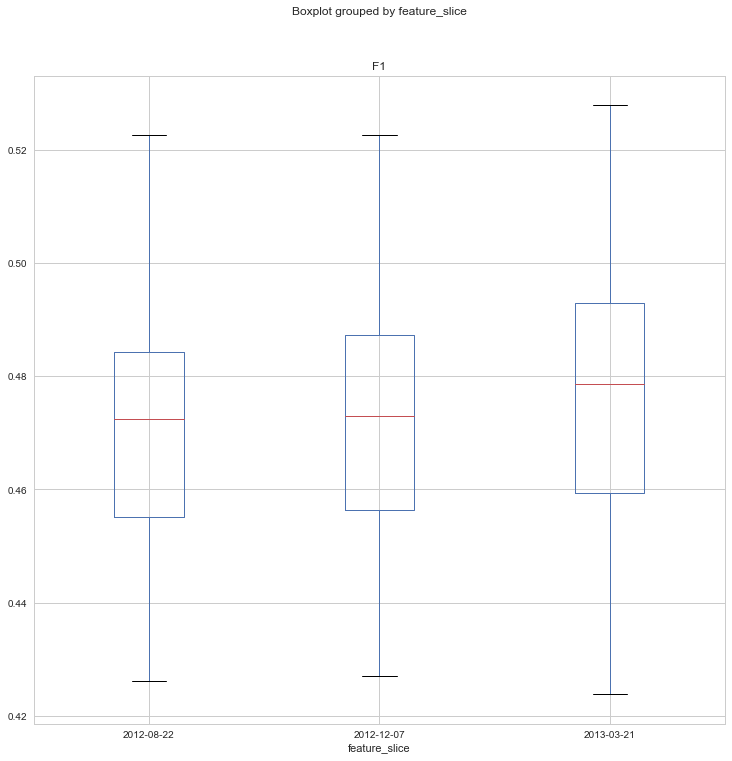

In [104]:
#df.groupby("feature_slice")["AUC"].plot(kind="box")
df.boxplot(column="F1", by="feature_slice")

In [124]:
df = df.reset_index()

In [130]:
unique_params = {v:k for k,v in dict(enumerate(df["Params_str"].unique().tolist())).items()}

dict_keys(["{'steps': [('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)), ('absolute', FunctionTransformer(accept_sparse=False, func=<ufunc 'absolute'>,\n          inv_kw_args=None, inverse_func=None, kw_args=None, pass_y=False,\n          validate=True)), ('transformer', FunctionTransformer(accept_sparse=False, func=None, inv_kw_args=None,\n          inverse_func=None, kw_args=None, pass_y=False, validate=True)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('extractor', PCA(copy=True, iterated_power='auto', n_components=31, random_state=None,\n  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=0.25118864315095824, class_weight='balanced', dual=False,\n          fit_intercept=True, intercept_scaling=1, max_iter=100,\n          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,\n          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))], 'imputer': Imputer(axis=0, copy=Tr

In [132]:
df["Params_str_dummy"] = df["Params_str"].replace(unique_params)
df["Params_str_dummy"].head()

0    0
1    1
2    2
3    3
4    4
Name: Params_str_dummy, dtype: int64

In [142]:
sorted_params = df.groupby("Params_str_dummy")["F1"].mean().sort_values(ascending=False).index

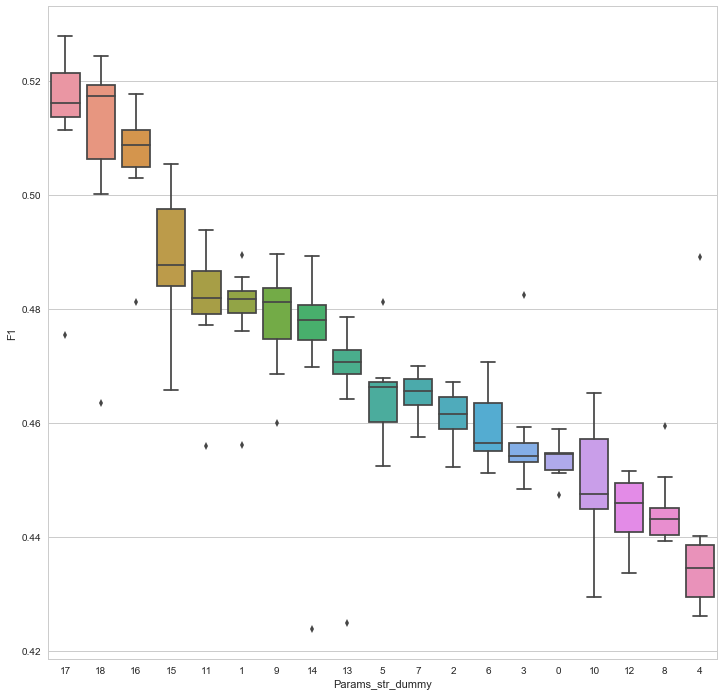

In [143]:
sns.boxplot(data = df, y="F1", x="Params_str_dummy", order=sorted_params)

In [74]:
df

,index,AUC,Classifier,F1,MC,PRC,Params,ROC_FPR,ROC_TPR,ROC_Thresholds,...,output_folder_evaluate,output_slices_path_evaluate,output_log_evaluate,test_path,test_date,test_feature_config,test_label_config,test_merge_config,final_merge_config,Params_str
0,0,0.746956,"(DecisionTreeClassifier(class_weight=None, cri...",0.480441,0.386545,0.558268,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...","[0.0, 0.0, 5.78201792426e-05, 5.78201792426e-0...","[0.000332667997339, 0.000998003992016, 0.00099...","[0.92578081769, 0.918514428068, 0.91750521128,...",...,analysis/output/autoVC/12/evaluate/,analysis/output/autoVC/12/evaluate/stored_slic...,analysis/output/autoVC/12/evaluate/log_results...,analysis/input/test.db,2017-04-04,analysis/config/test_feature.sql,analysis/config/test_label.sql,analysis/config/test_merge.sql,analysis/config/master_test_merge.sql,"{'steps': [('imputer', Imputer(axis=0, copy=Tr..."
1,0,0.746565,"(DecisionTreeClassifier(class_weight=None, cri...",0.482979,0.388762,0.557491,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...","[0.0, 0.0, 5.7823522609e-05, 5.7823522609e-05,...","[0.000332667997339, 0.000665335994677, 0.00066...","[0.922465604004, 0.919124630769, 0.91847860232...",...,analysis/output/autoVC/12/evaluate/,analysis/output/autoVC/12/evaluate/stored_slic...,analysis/output/autoVC/12/evaluate/log_results...,analysis/input/test.db,2017-04-04,analysis/config/test_feature.sql,analysis/config/test_label.sql,analysis/config/test_merge.sql,analysis/config/master_test_merge.sql,"{'steps': [('imputer', Imputer(axis=0, copy=Tr..."
2,0,0.737258,"(DecisionTreeClassifier(class_weight=None, cri...",0.472815,0.374801,0.546500,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...","[0.0, 0.0, 0.000115647045218, 0.00011564704521...","[0.000332667997339, 0.000998003992016, 0.00099...","[0.91609769728, 0.914501709158, 0.911981564493...",...,analysis/output/autoVC/12/evaluate/,analysis/output/autoVC/12/evaluate/stored_slic...,analysis/output/autoVC/12/evaluate/log_results...,analysis/input/test.db,2017-04-04,analysis/config/test_feature.sql,analysis/config/test_label.sql,analysis/config/test_merge.sql,analysis/config/master_test_merge.sql,"{'steps': [('imputer', Imputer(axis=0, copy=Tr..."
0,0,0.727758,"LogisticRegression(C=1.584893192461114, class_...",0.489037,0.390311,0.537617,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...","[0.0, 0.0, 0.000115640358485, 0.00011564035848...","[0.000332667997339, 0.00166333998669, 0.001663...","[1.0, 0.99999996779, 0.999812758278, 0.9996739...",...,analysis/output/autoVC/12/evaluate/,analysis/output/autoVC/12/evaluate/stored_slic...,analysis/output/autoVC/12/evaluate/log_results...,analysis/input/test.db,2017-04-04,analysis/config/test_feature.sql,analysis/config/test_label.sql,analysis/config/test_merge.sql,analysis/config/master_test_merge.sql,"{'steps': [('imputer', Imputer(axis=0, copy=Tr..."
1,0,0.738333,"LogisticRegression(C=1.584893192461114, class_...",0.503000,0.407815,0.551174,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...","[0.0, 0.0, 5.7823522609e-05, 5.7823522609e-05,...","[0.000332667997339, 0.000665335994677, 0.00066...","[0.999999395576, 0.999724829695, 0.99887492741...",...,analysis/output/autoVC/12/evaluate/,analysis/output/autoVC/12/evaluate/stored_slic...,analysis/output/autoVC/12/evaluate/log_results...,analysis/input/test.db,2017-04-04,analysis/config/test_feature.sql,analysis/config/test_label.sql,analysis/config/test_merge.sql,analysis/config/master_test_merge.sql,"{'steps': [('imputer', Imputer(axis=0, copy=Tr..."
2,0,0.720810,"LogisticRegression(C=1.584893192461114, class_...",0.482291,0.381851,0.529491,"{'steps': [('imputer', Imputer(axis=0, copy=Tr...","[0.0, 0.000115647045218, 0.000115647045218, 0....","[0.000332667997339, 0.000332667997339, 0.00066...","[0.999999999999, 0.999999513634, 0.99999948284...",...,analysis/output/autoVC/12/evaluate/,analysis/output/autoVC/12/evaluate/stored_slic...,analysis/output/autoVC/12/evaluate/log_results...,analysis/input